# Q. Build Sentimental Analysis on Elon's Musk Tweets

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import string
import spacy
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
from nltk import tokenize
import textblob
import re

## Loading Data Set

In [2]:
book = pd.read_csv('Elon_musk.csv',error_bad_lines=False)
book[1:10]

,Unnamed: 0,Text
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,10,The most entertaining outcome is the most likely


## Cleaning the Data

In [3]:
def cleantext(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT[\s]+','',text)
    text = re.sub(r'https?:\/\/\s+','',text)
    return text

In [4]:
book['Text'] = book['Text'].apply(cleantext)
book[:10]

,Unnamed: 0,Text
0,1,I�m an alien
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...
2,3,Great interview!
3,4,Doge is underestimated
4,5,Congratulations Tesla China for amazing execu...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,_ Haha thanks :)
8,9,Indeed! Tweets definitely do not represent r...
9,10,The most entertaining outcome is the most likely


## Capturing the Subjectivity and Polarity

In [5]:
from textblob import TextBlob
def sentiment_analysis(book):
    sentiment = TextBlob(book['Text']).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])
book[['subjectivity','polarity']] = book.apply(sentiment_analysis, axis=1)
book

,Unnamed: 0,Text,subjectivity,polarity
0,1,I�m an alien,0.750000,-0.250000
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000
2,3,Great interview!,0.750000,1.000000
3,4,Doge is underestimated,0.000000,0.000000
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313
...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000
1996,1997,Samwise Gamgee,0.000000,0.000000
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000


## Creating the Word Cloud

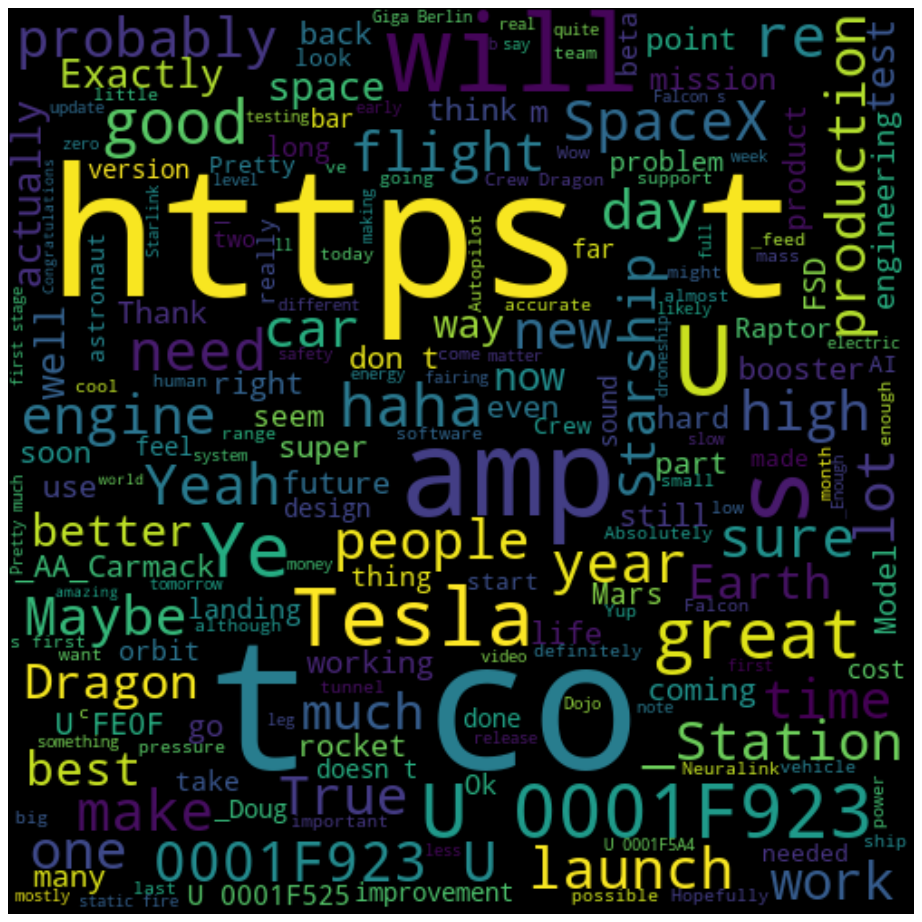

In [6]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = ''.join([twts for twts in book['Text']])
wordcloud = WordCloud(width= 500, height= 500, random_state= 21, max_font_size= 100).generate(allwords)
plt.figure(figsize=(15, 15), dpi=80)
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

## Calculating Polarity of Tweets

In [7]:
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

book['analysis'] = book['polarity'].apply(analysis)
book

,Unnamed: 0,Text,subjectivity,polarity,analysis
0,1,I�m an alien,0.750000,-0.250000,Negative
1,2,_AA_Carmack Ray tracing on Cyberpunk with HDR ...,0.000000,0.000000,Neutral
2,3,Great interview!,0.750000,1.000000,Positive
3,4,Doge is underestimated,0.000000,0.000000,Neutral
4,5,Congratulations Tesla China for amazing execu...,0.366667,0.345313,Positive
...,...,...,...,...,...
1994,1995,"True, it sounds so surreal, but the negative ...",0.508333,0.111111,Positive
1995,1996,Make sure to read ur terms &amp; conditions b...,0.888889,0.625000,Positive
1996,1997,Samwise Gamgee,0.000000,0.000000,Neutral
1997,1998,Altho Dumb and Dumber is <U+0001F525><U+0001F...,0.500000,-0.375000,Negative
